In [2]:
# using logistic regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# dropping the unwanted id column

df.drop('id', axis = 1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#data cleanup

def change(col):
    if col == 'Male':
        return 0
    elif col =='Female':
        return 1
    else:
        return 2

df['gender'] = df['gender'].apply(change)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
def clean_married(col):
    if col == 'Yes':
        return 1
    else:
        return 0
        
df['ever_married'] = df['ever_married'].apply(clean_married)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
def clean_work_type(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

df['work_type'] = df['work_type'].apply(clean_work_type)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1


In [7]:
def clean_residence_type(col):
    if col == 'Urban':
        return 1
    else:
        return 0
        
df['Residence_type'] = df['Residence_type'].apply(clean_residence_type)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,0,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,0,174.12,24.0,never smoked,1


In [8]:
def clean_smoking_status(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else: 
        return 3
    
df['smoking_status'] = df['smoking_status'].apply(clean_smoking_status)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,NaN,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [9]:
#this fills up the missing bmi values with the median of bmi

df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,28.1,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [10]:
#data is clean with good values

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# X is the matrix that contains all the observations with all the respective features for each one of them
# except the last one which is the label Y (that determines if the person had a stroke or not)

X = df.iloc[:, :-1].values
X

array([[  0.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   0.  ],
       [  1.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   1.  ],
       [  0.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   1.  ],
       ...,
       [  1.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   1.  ],
       [  0.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   3.  ]])

In [14]:
# Y is an array that contains a value of either 1 or 0 that describes if the corresponding person
# from the X matrix had a stroke or not

Y = df.iloc[:, -1]
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [15]:
# split the dataset into training set and testing set, with test set size of 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)

In [16]:
# standardize inputs

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [17]:
model = LogisticRegression(solver='newton-cg', C=10, random_state=0, max_iter=100)
model.fit(x_train, y_train)

LogisticRegression(C=10, random_state=0, solver='newton-cg')

In [18]:
# predicted weights for all the features

model.coef_

array([[-0.0310978 ,  1.73189567,  0.06228251,  0.09564596, -0.13431939,
        -0.28915958,  0.06160884,  0.15363426, -0.01004271,  0.00213466]])

In [19]:
# we have to standardize the test set as well because we standardized the training set

x_test = scaler.fit_transform(x_test)

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
model.score(x_test, y_test)

0.9481409001956947

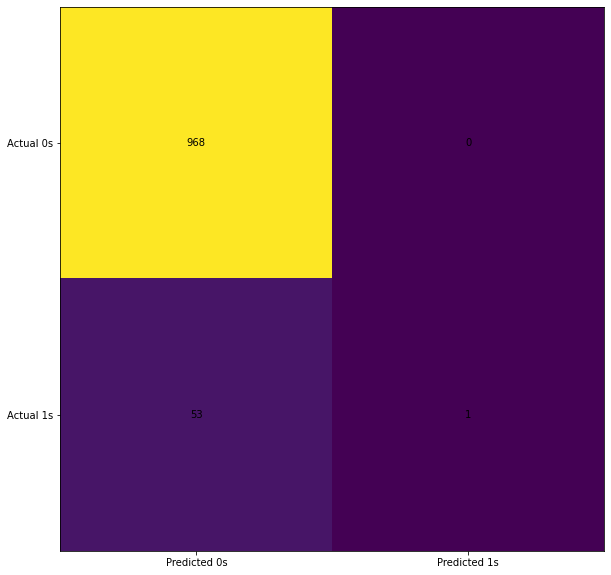

In [23]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [34]:
# using support vector machines

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

y_pred_SVM = classifier.predict(x_test)

In [35]:
model.score(x_test, y_test)

0.9481409001956947

In [37]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



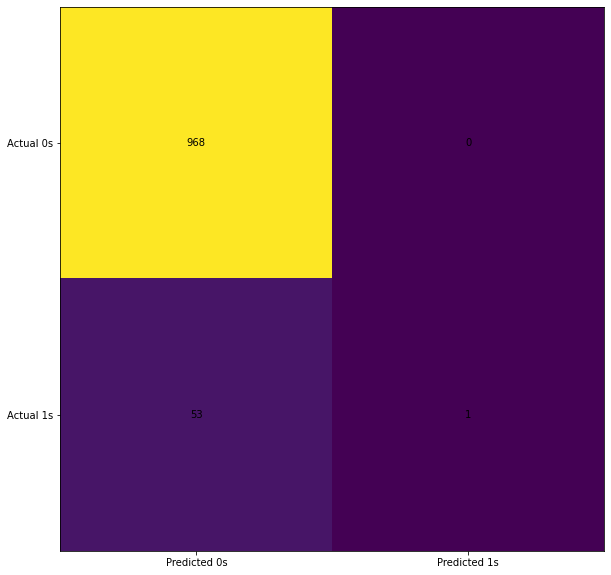

In [38]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()